In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
# from kerastuner.tuners import RandomSearch
from scipy.signal import savgol_filter
from mlxtend.evaluate import confusion_matrix
import random

In [122]:
data = pd.read_csv("/home/sonn/Son/Workspace/IR_PhanLoaiNuocCam/IR/data/processed/data_giong.csv")
data.head()

,TenMau,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,xadoai,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,vinh,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,xadoai,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,vinh,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,sanh,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [123]:
X = data.iloc[:,1:]
X.head()

,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,682.1028,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,0.270213,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,0.307793,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,0.385570,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,0.225304,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,0.252468,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [124]:
# tenmau = data["TenMau"]

In [125]:
# ma = []
# for mau in tenmau:
#     ma.append(mau.replace("/", "")[0:2])


In [126]:
# data["TenMau"] = ma

In [127]:
data.head()

,TenMau,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,xadoai,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,vinh,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,xadoai,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,vinh,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,sanh,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [128]:
y = data['TenMau']

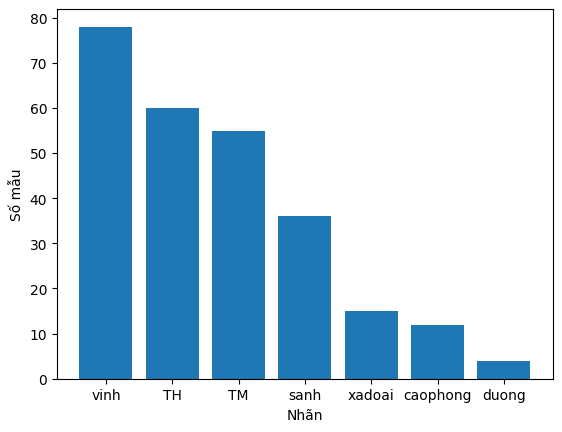

In [129]:
label_counts = y.value_counts()

# Plotting
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.show()

In [130]:
labels = np.unique(y)
le = LabelEncoder()
y = le.fit_transform(y)

In [131]:
X = savgol_filter(X, window_length=25, polyorder=3, deriv=2)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208, 900), (52, 900), (208,), (52,))

In [133]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE()
# # Fit the model to generate the data.
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

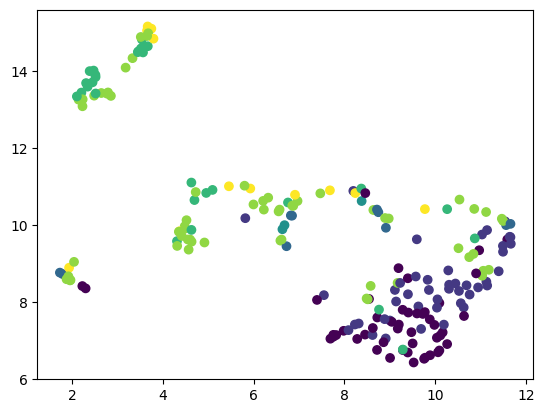

In [135]:
pca = umap.UMAP()
X_train_pca = pca.fit_transform(X_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train)
plt.show()

In [136]:
onehot = OneHotEncoder(sparse_output=False)
y_train = onehot.fit_transform(y_train.reshape(-1,1))
y_test = onehot.fit_transform(y_test.reshape(-1,1))

In [137]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [138]:
tf.random.set_seed(1)
random.seed(1)
np.random.seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Conv1D(filters=24, kernel_size=3))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=24, kernel_size=3))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

# model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer="Adam", loss = 'CategoricalCrossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size=8, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5429 - loss: 1.6289 - val_accuracy: 0.5000 - val_loss: 1.2275
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6382 - loss: 0.8870 - val_accuracy: 0.5962 - val_loss: 1.0626
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7951 - loss: 0.5054 - val_accuracy: 0.7115 - val_loss: 1.0880
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8935 - loss: 0.2965 - val_accuracy: 0.7692 - val_loss: 0.9731
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9793 - loss: 0.1368 - val_accuracy: 0.7500 - val_loss: 1.2545
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9959 - loss: 0.0768 - val_accuracy: 0.7308 - val_loss: 1.6239
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9642 - loss: 0.1474 - val_accuracy: 0.7500 - val_loss: 1.3843
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9701 - loss: 0.0849 - val_accuracy: 0.7308 - val_loss

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7456c033d3a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


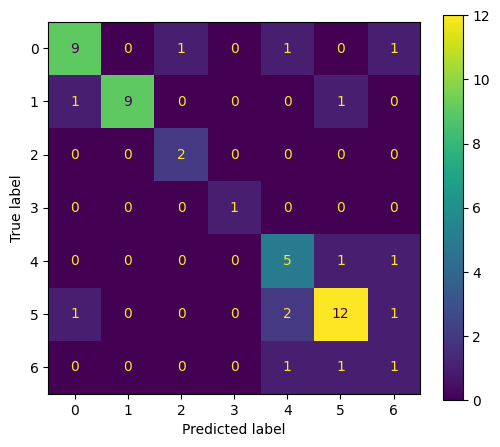

In [139]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_m = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_m, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

In [140]:
print(accuracy_score(y_test_m, y_pred))

0.75
